# Employee Exit Survey Analysis

This data analysis project looks at the exit surveys of the Department of Education, Training and Employment (DETE), and the Technical and Further Education (TAFE) institute. We will analyze the reasons as to why employees are resigning and what factors affect that. Let's first import our libraries and read in our csv files.

In [1]:
import numpy as np
import pandas as pd
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [4]:
dete_survey.head()


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We can see that there is a lot of NaN values in both of the heads of these datasets. In the dete survey, 4 columns have very little use as they contain many more NaN values than useful data. In tafe, there are a couple rows which range from 500-700 non-null values out of the 821 rows.

Let's now fix up the data and organize the columns

## Identify Missing Values and Drop Unnecessary Columns

In [6]:
# All values which are N/A are set to NaN to make data consistent
dete_survey = pd.read_csv("dete_survey.csv", na_values = 'Not Stated')

# Drop unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

The changes above were made to make the data more consistent and useful. Getting rid of unnecessary columns help us to keep what we need and our information organized.

## Clean Column Names

In [7]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
tafe_survey_updated = tafe_survey_updated.rename(columns = {'Record ID': 'id','CESSATION YEAR': 'cease_date',
                                                            'Reason for ceasing employment': 'separationtype'
                                                           ,'Gender. What is your Gender?': 'gender',
                                                           'CurrentAge. Current Age': 'age',
                                                           'Employment Type. Employment Type': 'employment_status',
                                                           'Classification. Classification': 'position',
                                                           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                                            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

In [8]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [9]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The names were altered in a way that would make the analysis overall easier to perform. Such as having all lowercase allows us to grab the columns from the dataset without worrying about which letters are uppercase etc. Simplifying long column names also saves time when performing analysis.

## Filter the Data

In [10]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [11]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [12]:
dete_resignations = dete_survey_updated.copy()
dete_resignations = dete_resignations[dete_resignations['separationtype'].str.contains('Resignation') == True]
tafe_resignations = tafe_survey_updated.copy()
tafe_resignations = tafe_resignations[tafe_resignations['separationtype'].str.contains('Resignation') == True]

What we did was only account for the individuals who resigned for the company as our analysis is around the question of the factors of resignation, every other reason for leaving the company is irrelevant.

## Verify the Data

In [13]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r"([1-2][0-9]{3})")
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [14]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [15]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

We can see that the earliest day of starting in dete is 1963, while the latest is 2013. The earliest day of resignation is 2006 while the latest is 2013. The latest cease date in tafe was 2013 while the earliest was 2009. Most employees in dete left in 2012 - 2013 while most for tafe left in 2011.

## Create a New Column

In [16]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


What we did is created a new column establishing how long an individual stayed at the company for dete, this column can be found in the tafe dataframe.

## Identify Dissatisfied Employees

In [17]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [18]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [19]:
def update_vals(x):
    if pd.isnull(x):
        return np.nan
    elif x == '-':
        return False
    else:
        return True

In [20]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [21]:
tafe_factors = ["Contributing Factors. Dissatisfaction",
                "Contributing Factors. Job Dissatisfaction"]

dete_factors = ["job_dissatisfaction",
                "dissatisfaction_with_the_department",
                "physical_work_environment",
                "lack_of_recognition",
                "lack_of_job_security",
                "work_location",
                "employment_conditions",
                "work_life_balance",
                "workload"]

tafe_resignations["dissatisfied"] = tafe_resignations[tafe_factors].any(axis=1, skipna=False)
dete_resignations["dissatisfied"] = dete_resignations[dete_factors].any(axis=1, skipna=False)

tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

What we did is essentially changed the dissatisfaction values of the tafe dataframe to legible values such as true, false, and nan.

## Combining the data

In [22]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [23]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up],axis=0, ignore_index = True)

In [24]:
combined_updated = combined.dropna(axis = 1, thresh = 500)
combined_updated.columns

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute'],
      dtype='object')

What we did was combined the two datasets, and dropped any useless columns (columns with less than 500 non-null values).

## Clean the Service Column

In [25]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


In [26]:
combined_updated = combined_updated.copy()
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r"(\d+)").astype(float)

In [27]:
def experience(x):
    if pd.isnull(x):
        return np.nan
    elif int(x) < 3:
        return "New"
    elif int(x) >= 3 and int(x) <= 6:
        return "Experienced"
    elif int(x) >= 7 and int(x) <= 10:
        return "Established"
    elif int(x) >= 11:
        return "Veteran"

In [28]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(experience)
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

What we did now is added a new column creating different labels on how long each person worked at the companies for. This allows us to easier analyze data without having a ton of different unique values.

## Analysis

In [29]:
combined_updated['dissatisfied'].value_counts(dropna = False)

True     489
False    162
Name: dissatisfied, dtype: int64

In [30]:
pivot = combined_updated.pivot_table(values = 'dissatisfied' ,index = 'service_cat', aggfunc = np.mean)
pivot

,dissatisfied
service_cat,
Established,0.741935
Experienced,0.761628
New,0.818653
Veteran,0.676471


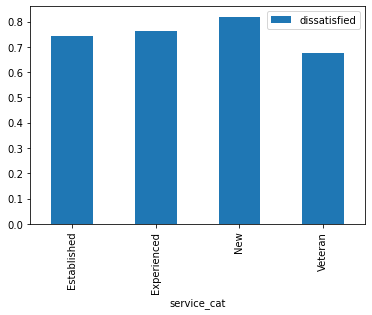

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
pivot.plot(kind = 'bar')
plt.show()

We can see that newer individuals are more likely to be dissatisfied at the company compared to older veterans.